DeepElecForecast: Exploratory Data Analysis

In [4]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set_theme(style="darkgrid", palette="tab10")

Load raw electricity data

In [5]:
raw_path = "../data/raw/electricity.csv"
df = pd.read_csv(raw_path, index_col=0)
df.index = pd.to_datetime(df.index)
print("Data shape:", df.shape)
df.head()

Data shape: (140256, 370)


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Inspect dataset

In [6]:
print("Columns:", df.columns.tolist())
print("\nMissing values:\n", df.isna().sum())
print("\nData types:\n", df.dtypes)
print("\nStatistics:\n", df.describe())

Columns: ['MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005', 'MT_006', 'MT_007', 'MT_008', 'MT_009', 'MT_010', 'MT_011', 'MT_012', 'MT_013', 'MT_014', 'MT_015', 'MT_016', 'MT_017', 'MT_018', 'MT_019', 'MT_020', 'MT_021', 'MT_022', 'MT_023', 'MT_024', 'MT_025', 'MT_026', 'MT_027', 'MT_028', 'MT_029', 'MT_030', 'MT_031', 'MT_032', 'MT_033', 'MT_034', 'MT_035', 'MT_036', 'MT_037', 'MT_038', 'MT_039', 'MT_040', 'MT_041', 'MT_042', 'MT_043', 'MT_044', 'MT_045', 'MT_046', 'MT_047', 'MT_048', 'MT_049', 'MT_050', 'MT_051', 'MT_052', 'MT_053', 'MT_054', 'MT_055', 'MT_056', 'MT_057', 'MT_058', 'MT_059', 'MT_060', 'MT_061', 'MT_062', 'MT_063', 'MT_064', 'MT_065', 'MT_066', 'MT_067', 'MT_068', 'MT_069', 'MT_070', 'MT_071', 'MT_072', 'MT_073', 'MT_074', 'MT_075', 'MT_076', 'MT_077', 'MT_078', 'MT_079', 'MT_080', 'MT_081', 'MT_082', 'MT_083', 'MT_084', 'MT_085', 'MT_086', 'MT_087', 'MT_088', 'MT_089', 'MT_090', 'MT_091', 'MT_092', 'MT_093', 'MT_094', 'MT_095', 'MT_096', 'MT_097', 'MT_098', 'MT_099', 

Plot electricity consumption for a sample client

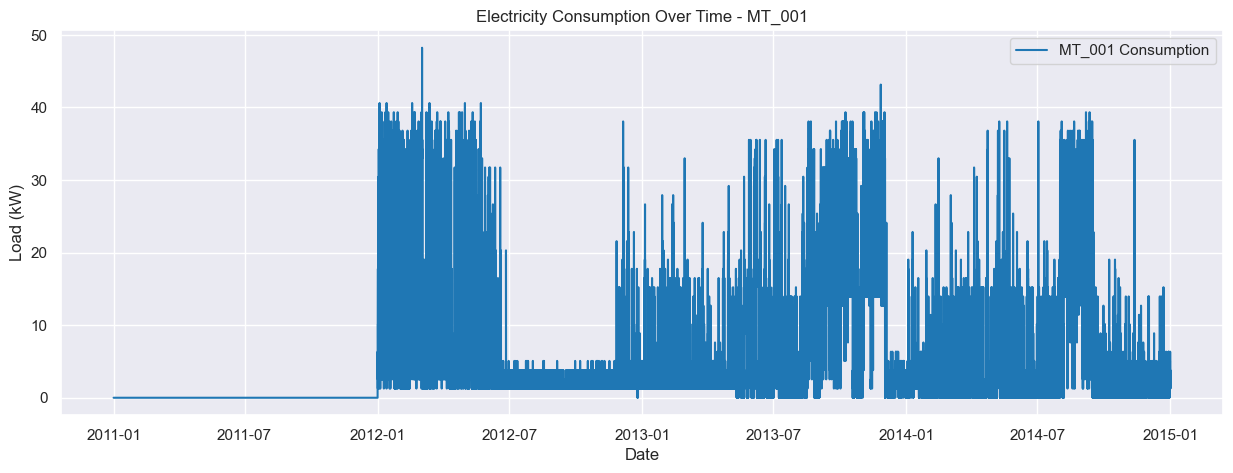

In [7]:
client = "MT_001"
plt.figure(figsize=(15,5))
plt.plot(df[client], label=f"{client} Consumption")
plt.title(f"Electricity Consumption Over Time - {client}")
plt.xlabel("Date")
plt.ylabel("Load (kW)")
plt.legend()
plt.show()

Plot multiple clients (first 5 columns)

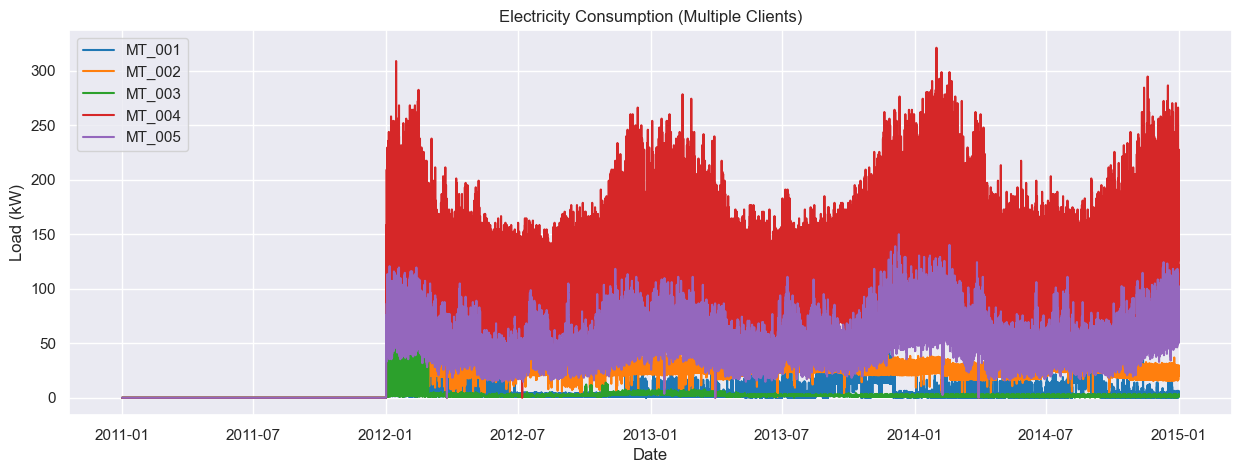

In [8]:
plt.figure(figsize=(15,5))
for c in df.columns[:5]:
    plt.plot(df[c], label=c)
plt.title("Electricity Consumption (Multiple Clients)")
plt.xlabel("Date")
plt.ylabel("Load (kW)")
plt.legend()
plt.show()

Missing values heatmap

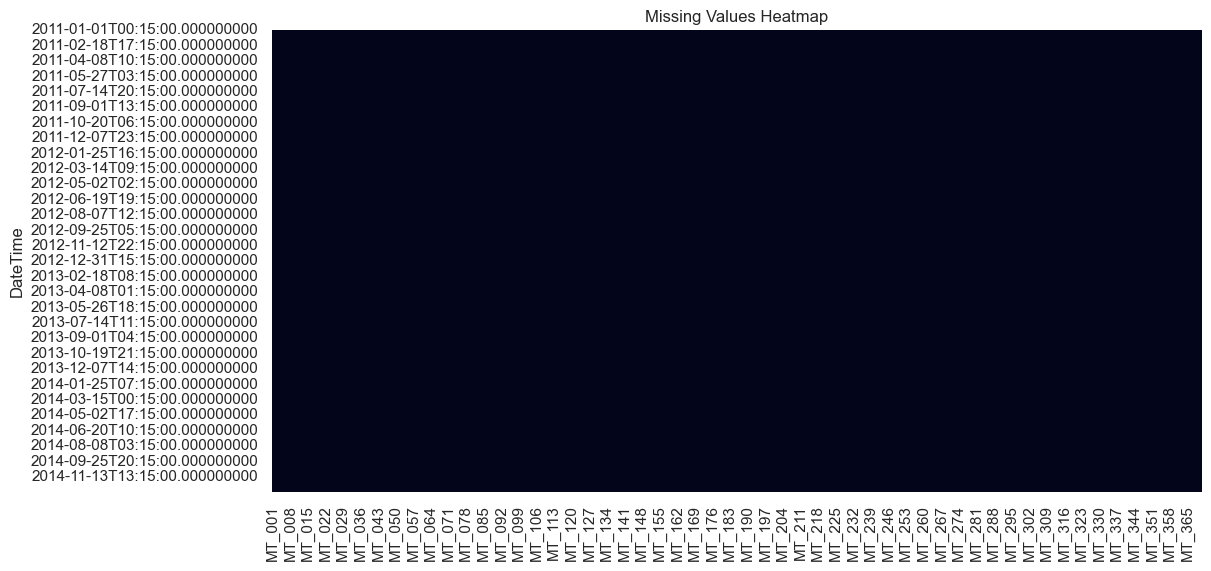

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

Distribution of electricity load

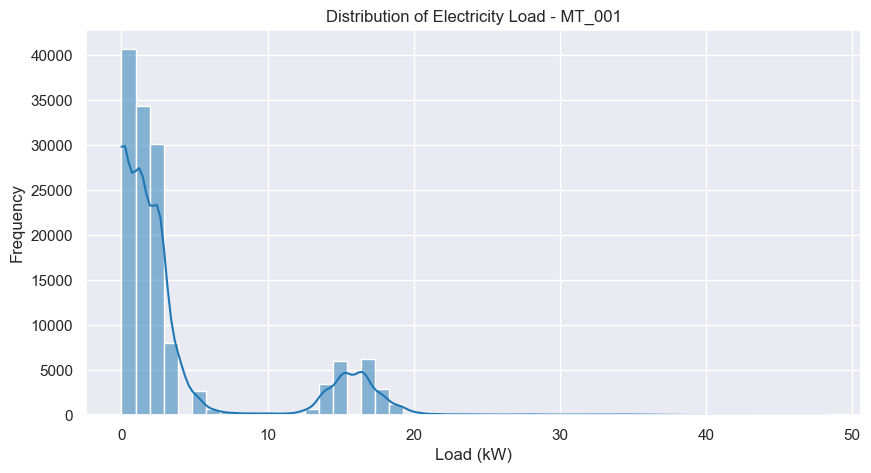

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df[client].dropna(), bins=50, kde=True)
plt.title(f"Distribution of Electricity Load - {client}")
plt.xlabel("Load (kW)")
plt.ylabel("Frequency")
plt.show()

Resample to hourly and daily means

C:\Users\PRIYANKA MANI\AppData\Local\Temp\ipykernel_20740\1302555539.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = df.resample("H").mean()


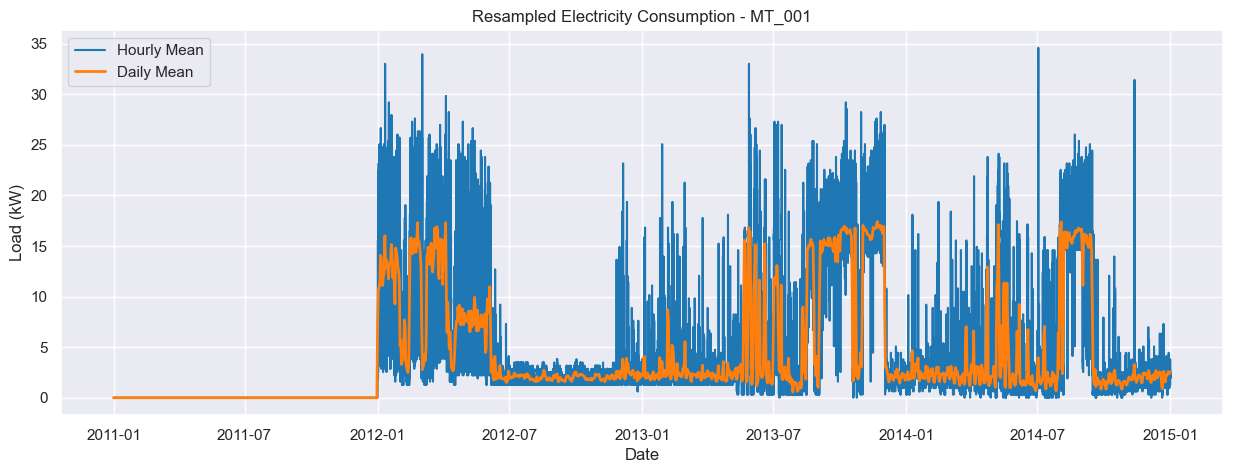

In [11]:
hourly = df.resample("H").mean()
daily = df.resample("D").mean()

plt.figure(figsize=(15,5))
plt.plot(hourly[client], label="Hourly Mean")
plt.plot(daily[client], label="Daily Mean", linewidth=2)
plt.title(f"Resampled Electricity Consumption - {client}")
plt.xlabel("Date")
plt.ylabel("Load (kW)")
plt.legend()
plt.show()

Correlation between clients

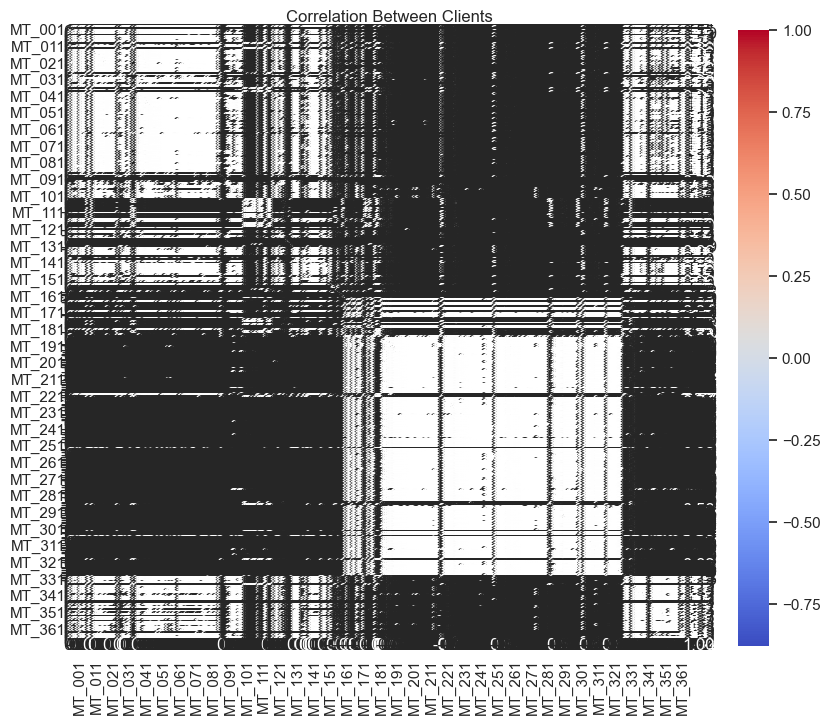

In [12]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Clients")
plt.show()

Rolling statistics to check trends

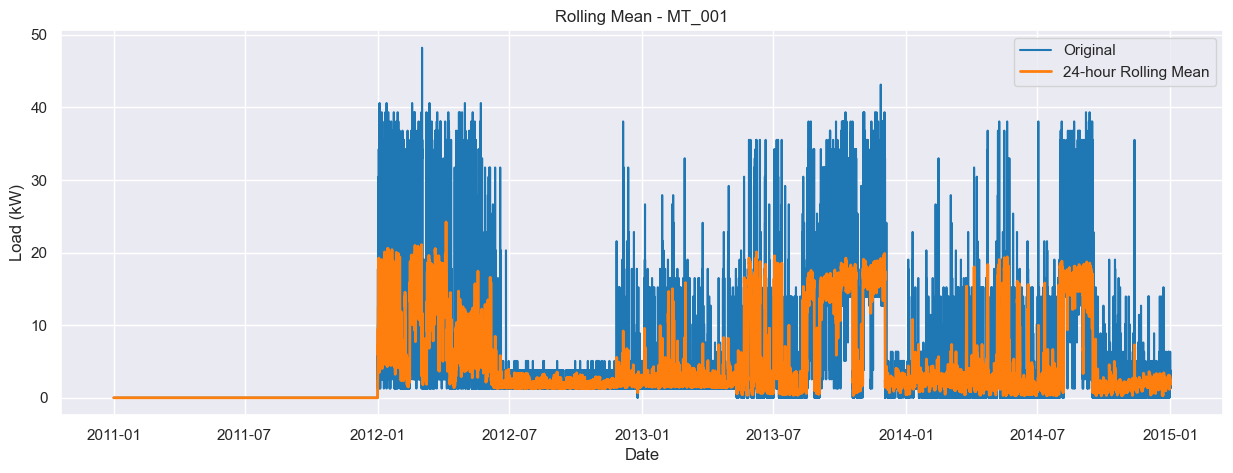

In [13]:
window = 24  
rolling_mean = df[client].rolling(window=window).mean()

plt.figure(figsize=(15,5))
plt.plot(df[client], label="Original")
plt.plot(rolling_mean, label=f"{window}-hour Rolling Mean", linewidth=2)
plt.title(f"Rolling Mean - {client}")
plt.xlabel("Date")
plt.ylabel("Load (kW)")
plt.legend()
plt.show()

Save resampled hourly data

In [15]:
import os

os.makedirs("../data/processed", exist_ok=True)

hourly.to_csv("../data/processed/electricity_hourly.csv")
print("Hourly resampled data saved in data/processed/")

Hourly resampled data saved in data/processed/
